In [1]:
import pandas as pd
import numpy as np
import os 
import glob
import csv
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats



In [2]:
## Data preprocessing

def preprocess(path):
    df = pd.read_csv(path, skiprows = 6, delimiter = "\t")

    #Main function that calls all other functions
    strain = df["Mises(ln(V))"]
    stress = df["Mises(Cauchy)"]
    true_stress, true_strain, true_plastic_strain = getTruePlasticStrain(strain,stress)
    trimmedStress, trimmedStrain, trimmedTrueStrain, elasticStress, elasticStrain, elasticTrueStrain = elastic(true_stress, true_strain, true_plastic_strain)
    
    plot(elasticStress, elasticStrain, trimmedStress, trimmedStrain, trimmedTrueStrain)
    print("R-squared = " + str(adjR(elasticStrain, elasticStress, 1)))
    
    data = {
       "Trimmed Stress" : trimmedStress,
        "Trimmed Strain" : trimmedTrueStrain
    }
    newdf = pd.DataFrame(data)
    newdf.to_csv(path + ".csv", index=False)
    return elasticStress, elasticStrain, elasticTrueStrain, trimmedStress, trimmedStrain, trimmedTrueStrain


def getTruePlasticStrain(strain, stress):
    data = {
       "Mises(Cauchy)" : stress,
        "Mises(ln(V))" : strain
    }
    newdf = pd.DataFrame(data)
   
    # Getting the slope
    slope = (newdf["Mises(Cauchy)"][1] - newdf["Mises(Cauchy)"][0]) / (newdf["Mises(ln(V))"][1] - newdf["Mises(ln(V))"][0])
    newdf['True_plastic_strain'] = newdf["Mises(ln(V))"] - newdf["Mises(Cauchy)"] / slope
    
    true_stress = newdf["Mises(Cauchy)"]
    true_strain = newdf["Mises(ln(V))"]
    true_plastic_strain = newdf["True_plastic_strain"]
    
    return true_stress, true_strain, true_plastic_strain

def elastic(stress, strain, trueStrain):
    
    # Obtain the elastic stress and strain based on r-squared
    
    trimValue = np.arange(0.001, 0.02, 0.00001)
    trimValue = np.flip(trimValue)
    r2 = 0.00
    elasticTrueStrain = trueStrain
    elasticStrain = strain
    elasticStress = stress
    while(r2 <= 0.995):
        for x in trimValue:
            val = np.argmax(strain >= x)
            elasticTrueStrain = trueStrain[0:val]
            elasticStrain = strain[0:val]
            elasticStress = stress[0:val]
            r2 = adjR(elasticStrain, elasticStress, 1)
    
    
    trimmedTrueStrain = trueStrain
    trimmedStrain = strain
    trimmedStress = stress
    
    ##trimmedTrueStrain = trueStrain[val+1:len(trimmedTrueStrain)]
    ##trimmedStress = stress[val+1:len(trimmedTrueStrain)]
    ##trimmedStrain = strain[val+1:len(trimmedTrueStrain)]
  
    

    return trimmedStress, trimmedStrain, trimmedTrueStrain, elasticStress, elasticStrain, elasticTrueStrain

def plot(elasticStress, elasticStrain, trimmedStress, trimmedStrain, trimmedTrueStrain):
    
    plt.plot(trimmedStrain, trimmedStress, 'g', label = "Initial stress–strain curve")
    plt.plot(trimmedTrueStrain, trimmedStress, 'b', label = "Flow Curve")
    plt.plot(elasticStrain, elasticStress, 'r', label = "Elastic stress–strain curve")
    plt.rcParams['figure.figsize'] = [7, 7]
    leg = plt.legend(loc = "upper right")
    plt.xlabel(xlabel = "Strain (mm)")
    plt.ylabel(ylabel = "Stress (MPa)")
    plt.xlim([0, 0.005])
    plt.title("Data Processing Results")
    plt.show()


def adjR(x, y, degree):
    results = []
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

def print_output(directory):
    os.chdir(directory)
    filenames = [i for i in glob.glob("*.txt")]
    vr = {}
    for i in filenames:
        vr[i] = preprocess(i)
        data = {
           "Trimmed Stress" : vr[i][3],
            "Trimmed Strain" : vr[i][5]
        }
    newdf = pd.DataFrame(data)
    newdf.to_csv(i + ".csv", index=False) 
    


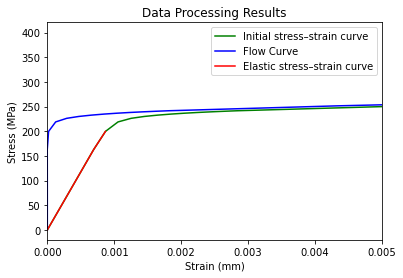

R-squared = 0.9995460424322485


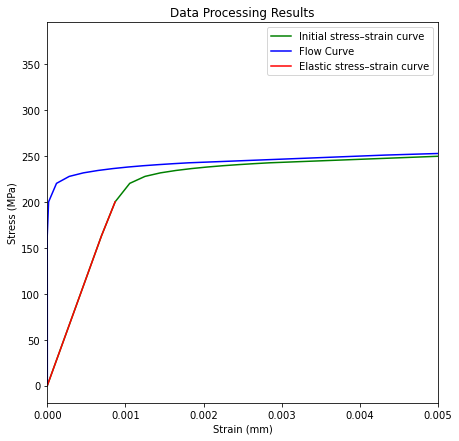

R-squared = 0.999652378635257


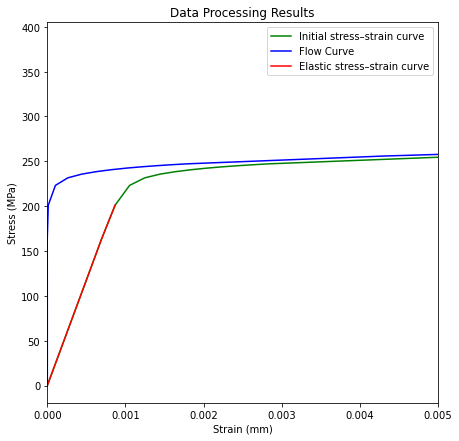

R-squared = 0.9998045871520373


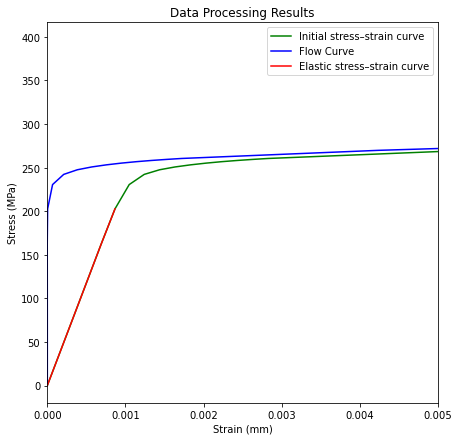

R-squared = 0.9999721088432669


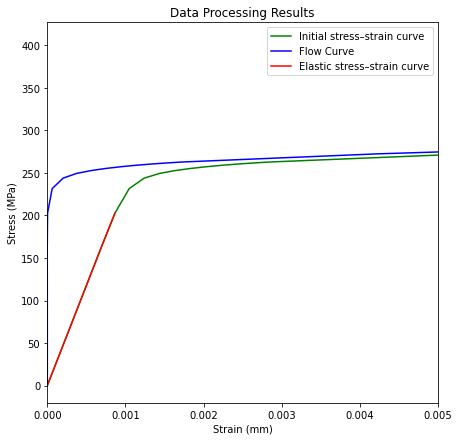

R-squared = 0.9999802728333993


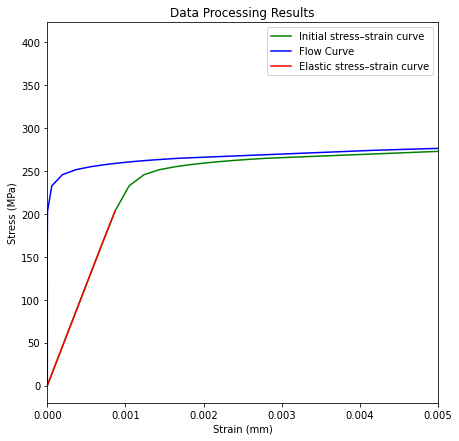

R-squared = 0.9999861258430432


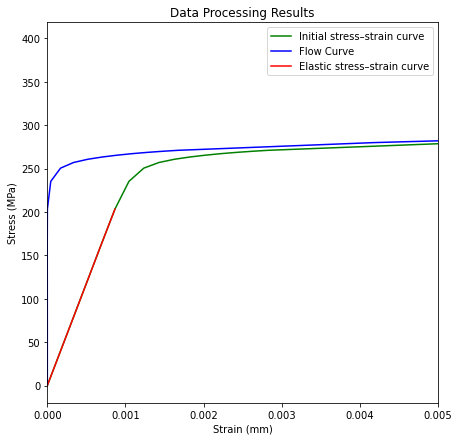

R-squared = 0.999995582226341


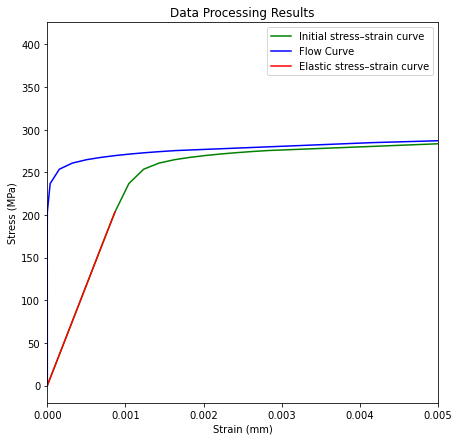

R-squared = 0.9999981998758268


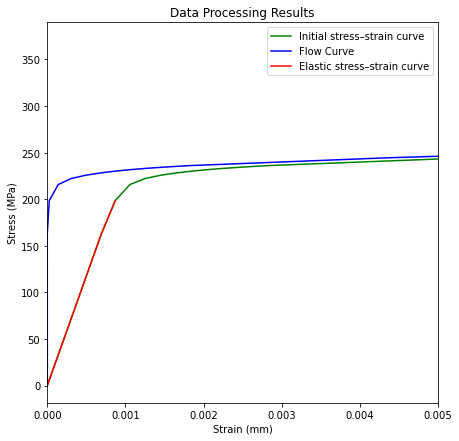

R-squared = 0.9992427764174443


In [3]:
os.chdir(r"/notebooks/CompEng Project/Untitled Folder")
filenames = [i for i in glob.glob("*.txt")]
vr = {}
for i in filenames:
    vr[i] = preprocess(i)
    data = {
       "Trimmed Stress" : vr[i][3],
        "Trimmed Strain" : vr[i][5]
    }
    newdf = pd.DataFrame(data)
    newdf.to_csv(i + ".csv", index=False) 


In [4]:

def elastic(stress, strain, trueStrain):
    
    # Obtain the elastic stress and strain based on r-squared
    
    trimValue = np.arange(0.001, 0.02, 0.00001)
    trimValue = np.flip(trimValue)
    r2 = 0.00
    elasticTrueStrain = trueStrain
    elasticStrain = strain
    elasticStress = stress
    while(r2 <= 0.95):
        for x in trimValue:
            val = np.argmax(strain >= x)
            elasticTrueStrain = trueStrain[0:val]
            elasticStrain = strain[0:val]
            elasticStress = stress[0:val]
            r2 = adjR(elasticStrain, elasticStress, 1)
            
    #trimmedTrueStrain = trueStrain.drop(range(1, val))
    #trimmedStress = stress.drop(range(1, val))
    #trimmedStrain = strain.drop(range(1, val))
  
    

    return elasticStress, elasticStrain, elasticTrueStrain

vr = [1, 2, 3, 4, 5, 6, 7]
for i in vr:
    sim_stress_ + str(i), true_strain_ + str(i), strain_obj + str(i)  = elastic("Exp_stress" + str(i), "truestrainobj" + str(i), "strainobj" + str(i))

SyntaxError: cannot assign to operator (<ipython-input-4-d4d4c97f8d75>, line 29)